<a href="https://colab.research.google.com/github/victoregomezf-maker/seminario/blob/main/DescriptivosP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# primero debemos llamar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sv=pd.read_csv("player_valuations (1).csv")
sv

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
487945,746973,2024-11-06,50000,234,NL1
487946,715382,2024-11-22,100000,1083,RU1
487947,928592,2024-11-27,350000,468,NL1
487948,929943,2024-11-29,500000,15,L1


Paso 3. Vamos a cambia los nombres de las columnas de ingles a español.

In [ ]:
sv.rename(columns={"market_value_in_eur":"precio_en_euros"}, inplace=True)

In [ ]:
sv_sorted=sv.sort_values(by="identificación del jugador", ascending=False)
sv_sorted

,identificación del jugador,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
487393,1306131,2024-10-08,100000,2503,PO1
486009,1302421,2024-09-12,100000,6992,UKR1
487648,1296876,2024-10-11,500000,237,ES1
487392,1294052,2024-10-08,150000,2503,PO1
487391,1294049,2024-10-08,100000,2503,PO1
...,...,...,...,...,...
118296,10,2014-07-07,1000000,398,IT1
29922,10,2009-08-30,12000000,398,IT1
106558,10,2014-01-07,1000000,398,IT1
129266,10,2015-01-07,1000000,398,IT1


**Paso 4. Estadistica descriptiva**

In [ ]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
sv.describe()

,identificación del jugador,precio_en_euros,current_club_id
count,487950.000,487950.000,487950.000
mean,219239.579,2402899.268,4405.281
std,201706.511,6810787.621,10837.278
min,10.000,0.000,3.000
25%,58413.000,200000.000,369.000
50%,161411.000,500000.000,1025.000
75%,325993.000,1600000.000,2995.000
max,1306131.000,200000000.000,110302.000


In [ ]:
sv["precio_en_euros"].mean()

np.float64(2402899.2683656113)

In [ ]:
sv["precio_en_euros"].median()

500000.0

In [ ]:
sv["precio_en_euros"].mode()

,precio_en_euros
0,300000


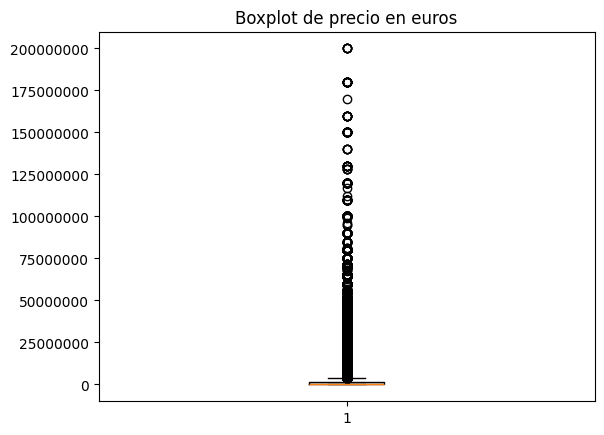

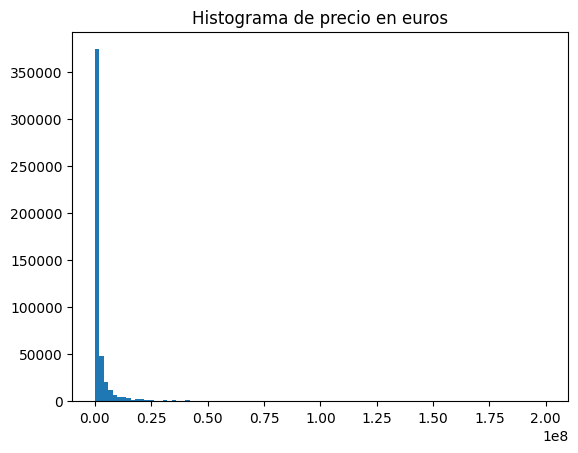

In [ ]:
#Inicio de graficos

#Ajustar la escala del eje Y para mostrar numeros completos
plt.ticklabel_format(style="plain", axis="y")

#Boxplot con Matplotlib
plt.boxplot(sv['precio_en_euros'])
plt.title('Boxplot de precio en euros')
plt.show()

#Histograma con Matplotlib
plt.hist(sv["precio_en_euros"], bins=100)
plt.title('Histograma de precio en euros')
plt.show()

Este proceso está relacionado con la identificación y tratamiento de outliers en un conjunto de datos. Aquí hay una explicación detallada paso a paso:

1. Cálculo de los Cuartiles (Q1, Q3):

01 representa el primer cuartil, que es el valor por debajo del cual se encuentra el 25% de los datos. Q3 representa el tercer cuartil, que es el valor por debajo del cual se encuentra el 75% de los datos. Estos cuartiles dividen el conjunto de datos en cuatro partes iguales.

2. Cálculo del Rango Intercuartilico (IQR):

El rango intercuartilico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Matemáticamente, IQRQ3 Q1.

3. Definición de Limites para Outliers:

Se establecen limites superior e inferior para identificar valores atipicos en los datos. El limite inferior se calcula restando 1.5 veces el IQR a Q1: lower bound Q1-1.5 IQR. El límite superior se calcula sumando 1.5 veces el IQR a Q3: upper bound Q3+1.5 IQR.

4. Identificación de Outliers:

Cualquier valor en el conjunto de datos que sea menor que el limite inferior o mayor que el limite superior se considera un outlier. Este enfoque, basado en el rango intercuartilico y los limites establecidos, es una técnica común para identificar y manejar valores atípicos en
un conjunto de datos. la idea es que los valores atipicos estan mas alla de ciertos limites estadisticos y pueden ser tratados de manera especial seguin los requisitos del analisis

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = sv['precio_en_euros'].quantile(0.25)
Q3 = sv['precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Aquí debemos filtrar el DataFrame para mantener solo los valores dentro de los límites
sv_filtered = sv[(sv['precio_en_euros'] >= lower_bound) & (sv['precio_en_euros'] <= upper_bound)]

In [ ]:
sv_filtered

,identificación del jugador,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
5,26,2004-10-04,1500000,16,L1
...,...,...,...,...,...
487945,746973,2024-11-06,50000,234,NL1
487946,715382,2024-11-22,100000,1083,RU1
487947,928592,2024-11-27,350000,468,NL1
487948,929943,2024-11-29,500000,15,L1


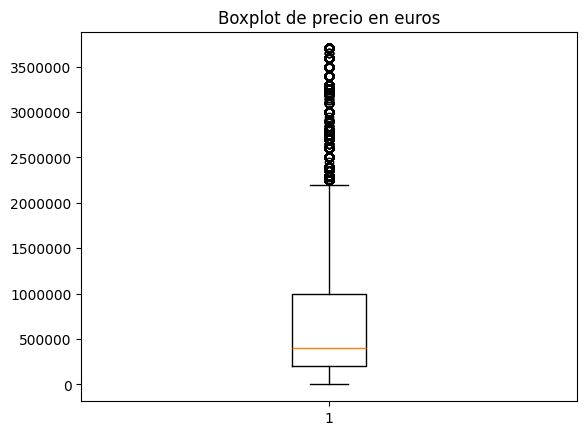

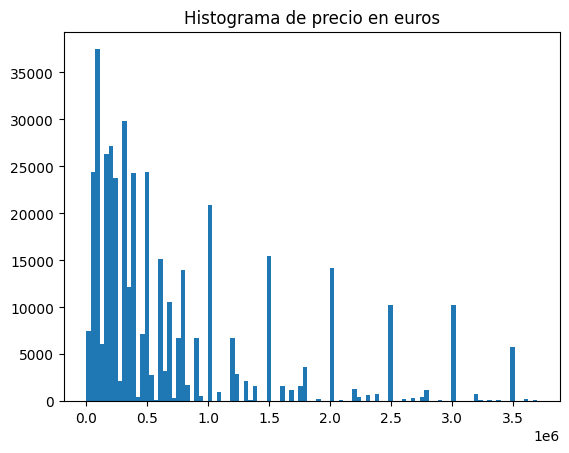

In [ ]:
#Ajustar la escala del eje Y para mostrar numeros completos
plt.ticklabel_format(style="plain", axis="y")

#Boxplot con Matplotlib
plt.boxplot(sv_filtered['precio_en_euros'])
plt.title('Boxplot de precio en euros')
plt.show()

#Histograma con Matplotlib
plt.hist(sv_filtered["precio_en_euros"], bins=100)
plt.title('Histograma de precio en euros')
plt.show()